# Задача 14
Используя данные о школьниках, выявить степень их алкогольной зависимости. В данных, взятых с UCI 'Students', содержится информация о 30 признаках для каждого школьника, включая социальные и гендерные, а также указана материальная обеспеченность и количество свободного времени. Выбрать на свой взгляд наиболее весомые признаки и предсказать степень употребления алкоголя по выходным или будним по шкале от 0 до 5.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

from subprocess import check_output
import os


In [6]:
student_mat_dataframe = pd.read_csv("/home/vitaly/Downloads/student-mat.csv") #read to csv file

In [7]:
print(student_mat_dataframe.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [8]:
trace1 = go.Box(
    y = student_mat_dataframe.Dalc,
    name = "Daily alcohol consumption",
    marker = dict(color = "red")
)
trace2 = go.Box(
    y = student_mat_dataframe.Walc,
    name = "Weekly  alcohol consumption",
    marker = dict(color = "blue")
)
concatTrace = [trace1,trace2]
iplot(concatTrace)

    X:Student Age

    Y: Daily alcohol consumption

    Z:Weekly alcohol consumption*


In [9]:
trace = go.Scatter3d(
    x = student_mat_dataframe.age,
    y = student_mat_dataframe.Dalc,
    z = student_mat_dataframe.Walc,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = student_mat_dataframe.age,
        colorscale = 'Rainbow'
    )
)
dataTrace = [trace]
layoutTrace = go.Layout(
    margin = dict(
    l = 0,
    r = 0,
    b = 0,
    t = 0 )
)
figTrace = go.Figure(data=dataTrace, layout=layoutTrace)
iplot(figTrace)


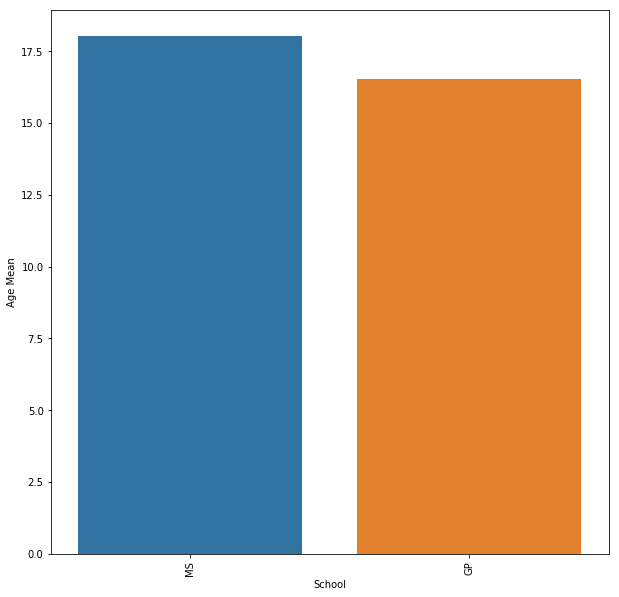

In [11]:
#There are two school at the list
school_list = list(student_mat_dataframe.school.unique())
age_mean = []
for i in school_list:
    x = student_mat_dataframe[student_mat_dataframe.school == i]
    age_sum = sum(x.age)/len(x)
    age_mean.append(age_sum)

#sorting
data = pd.DataFrame({'school_list':school_list,'age_mean':age_mean})
new_index = (data['age_mean'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

#visualization
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data['school_list'],y=sorted_data['age_mean'])
plt.xticks(rotation=90)
plt.xlabel("School")
plt.ylabel("Age Mean")
plt.show()

Below is the average timeout graph for schools shown

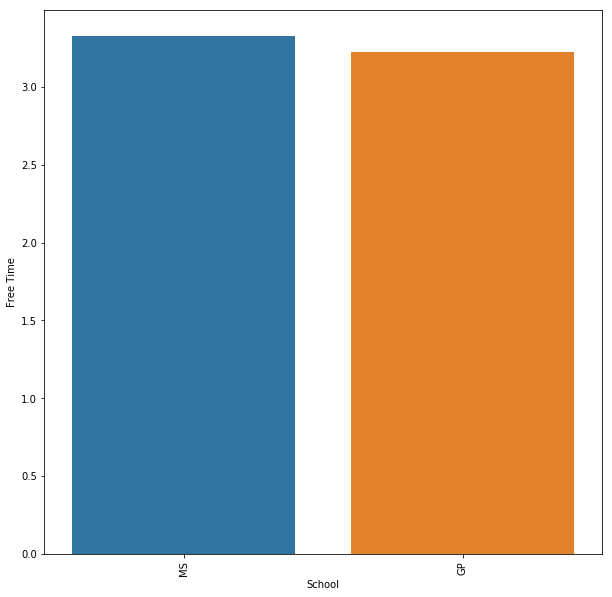

In [12]:
school_list = list(student_mat_dataframe.school.unique())
free_time = []
for i in school_list:
    x = student_mat_dataframe[student_mat_dataframe.school == i]
    freeTime = sum(x.freetime)/len(x)
    free_time.append(freeTime)

#sorting
data = pd.DataFrame({'school_list':school_list,'free_time':free_time})
new_index = (data['free_time'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_data2['school_list'],y=sorted_data2['free_time'])
plt.xticks(rotation=90)
plt.xlabel("School")
plt.ylabel("Free Time")
plt.show()

The sum of the places where children between 15 and 22 live with family members or live alone

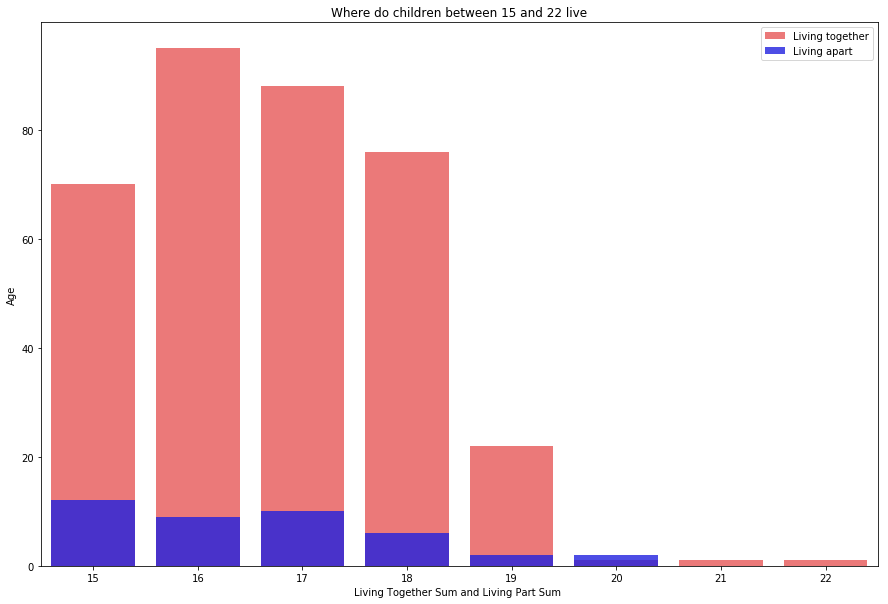

In [15]:
ageList = list(student_mat_dataframe.age.unique())

parentStatusT = []
parentStatusA = []

for i in ageList:
    x = student_mat_dataframe[student_mat_dataframe.age == i]
    parentStatusT.append(sum(x.Pstatus == "T"))
    parentStatusA.append(sum(x.Pstatus == "A"))
    
#sorting
sort_data2 = pd.DataFrame({'student_age':ageList,'student_status':parentStatusA})
new_index4 = (sort_data2['student_status'].sort_values(ascending=False)).index
sorted_data4 = sort_data2.reindex(new_index4)

f,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=ageList,y=parentStatusT,color="red",alpha=0.6,label="Living together")
sns.barplot(x=ageList,y=parentStatusA,color="blue",alpha=0.8,label="Living apart")
ax.legend(loc="upper right",frameon=True)
ax.set(xlabel="Living Together Sum and Living Part Sum ",ylabel="Age",title="Where do children between 15 and 22 live")
plt.show()

In [16]:
print(sorted_data.head())
print(sorted_data2.head())

  school_list   age_mean
1          MS  18.021739
0          GP  16.521490
  school_list  free_time
1          MS   3.326087
0          GP   3.223496


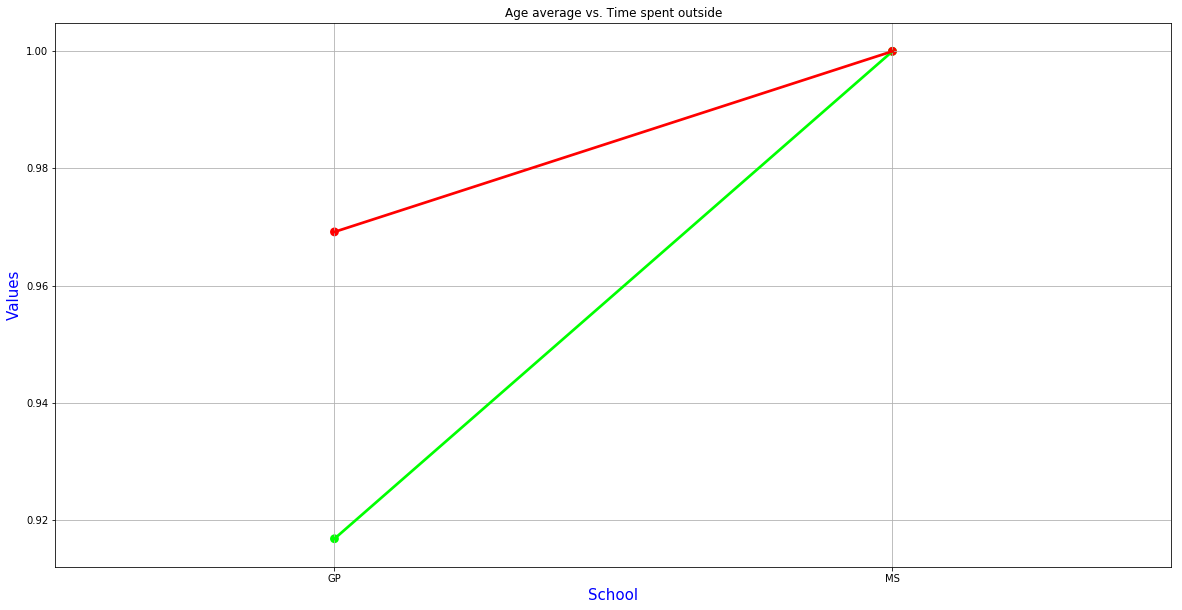

In [17]:
#Standardization
sorted_data['age_mean'] = sorted_data['age_mean']/max(sorted_data['age_mean'])
sorted_data2['free_time'] = sorted_data2['free_time']/max(sorted_data2['free_time'])

#Data Concat
data = pd.concat([sorted_data,sorted_data2['free_time']],axis=1)
data.sort_values('age_mean',inplace=True)


#Visualization
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x='school_list',y='age_mean',data=data,color='lime',alpha=0.6)
sns.pointplot(x='school_list',y='free_time',data=data,color='red',alpha=0.8)
plt.xlabel("School",fontsize=15,color='blue')
plt.ylabel("Values",fontsize=15,color='blue')
plt.title("Age average vs. Time spent outside")
plt.grid()

#Notice That: Red: Free Time, Lime: Age Mean

Showing the professions listed below

In [18]:
fatherJobs_Unique = list(student_mat_dataframe.Fjob.unique())
print(fatherJobs_Unique)

motherJobs_Unique = list(student_mat_dataframe.Mjob.unique())
print(motherJobs_Unique)

['teacher', 'other', 'services', 'health', 'at_home']
['at_home', 'health', 'other', 'services', 'teacher']


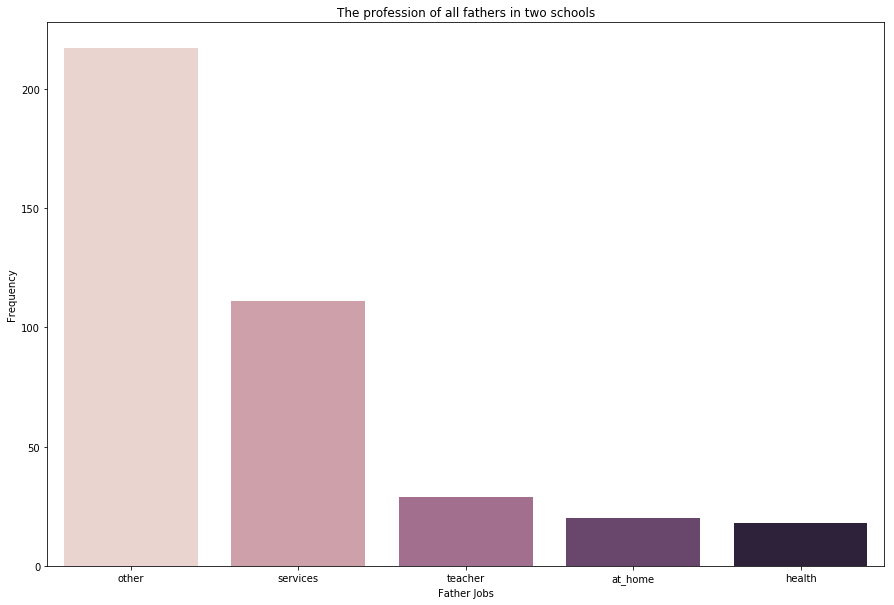

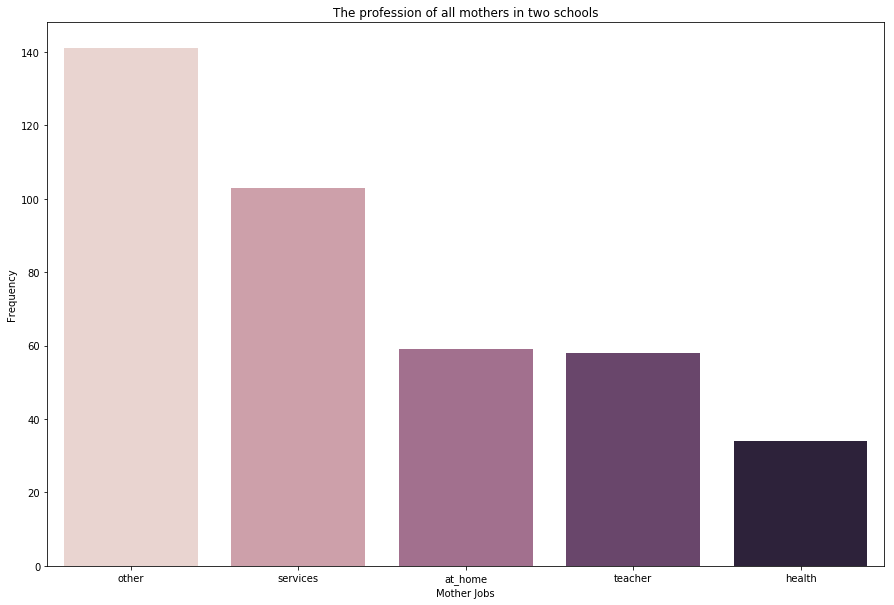

In [19]:
fatherJobs_xAxis = list(student_mat_dataframe.Fjob.unique())
fatherJobs_list = list(student_mat_dataframe.Fjob)
fJobsCounter = Counter(fatherJobs_list)
most_common_jobs = fJobsCounter.most_common(5)
x,y = zip(*most_common_jobs)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Father Jobs")
plt.ylabel("Frequency")
plt.title("The profession of all fathers in two schools")
plt.show()
############################################################
motherJobs_xAxis = list(student_mat_dataframe.Mjob.unique())
motherJobs_list = list(student_mat_dataframe.Mjob)
mJobsCounter = Counter(motherJobs_list)
most_common_jobs = mJobsCounter.most_common(5)
x,y = zip(*most_common_jobs)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Mother Jobs")
plt.ylabel("Frequency")
plt.title("The profession of all mothers in two schools")
plt.show()


Students who consume daily alcohol according to the professions of their parents

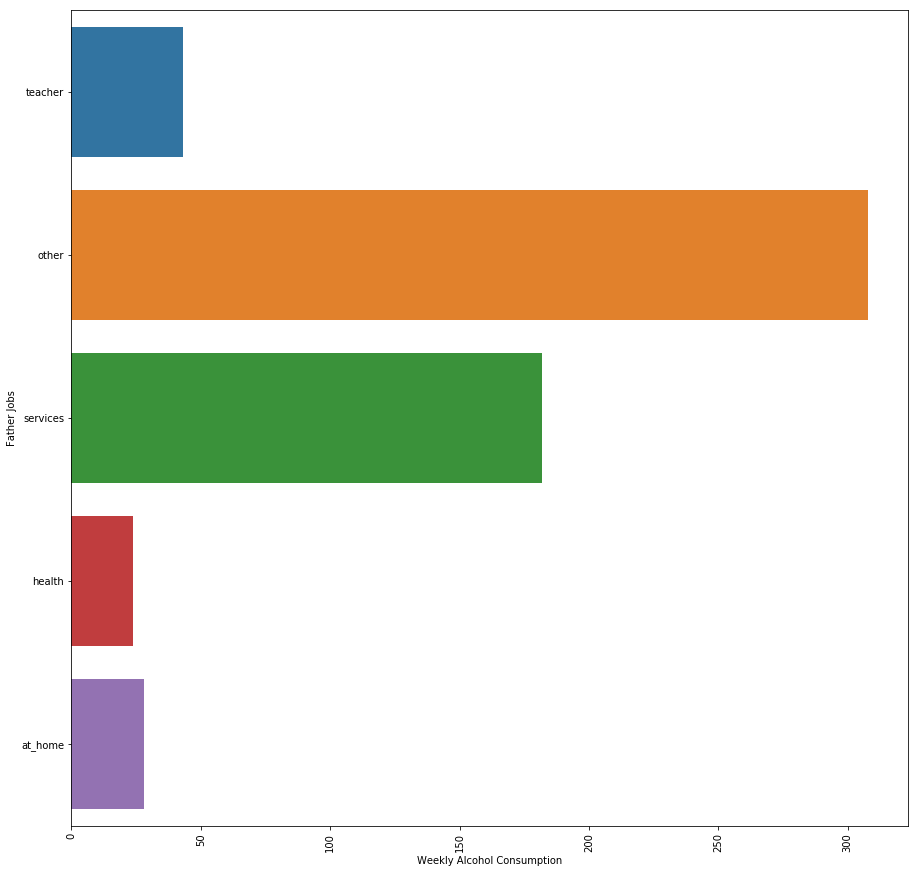

In [20]:
fatherJobsList = list(student_mat_dataframe.Fjob.unique())
FstudentDalc = []
for each in fatherJobsList:
    x = student_mat_dataframe[student_mat_dataframe.Fjob == each]
    FstudentDalc.append(sum(x.Dalc))

#sorting
sort_data = pd.DataFrame({'father_jobs':fatherJobsList,'student_dalc':FstudentDalc})
new_index3 = (sort_data['student_dalc'].sort_values(ascending=False)).index
sorted_data3 = sort_data.reindex(new_index3)

#Visualitizon    
plt.figure(figsize=(15,15))
sns.barplot(x=FstudentDalc,y=fatherJobsList)
plt.xticks(rotation=90)
plt.xlabel("Weekly Alcohol Consumption")
plt.ylabel("Father Jobs")
plt.show()

It shows whether there is internet available for two different schools depending on the age of the students.

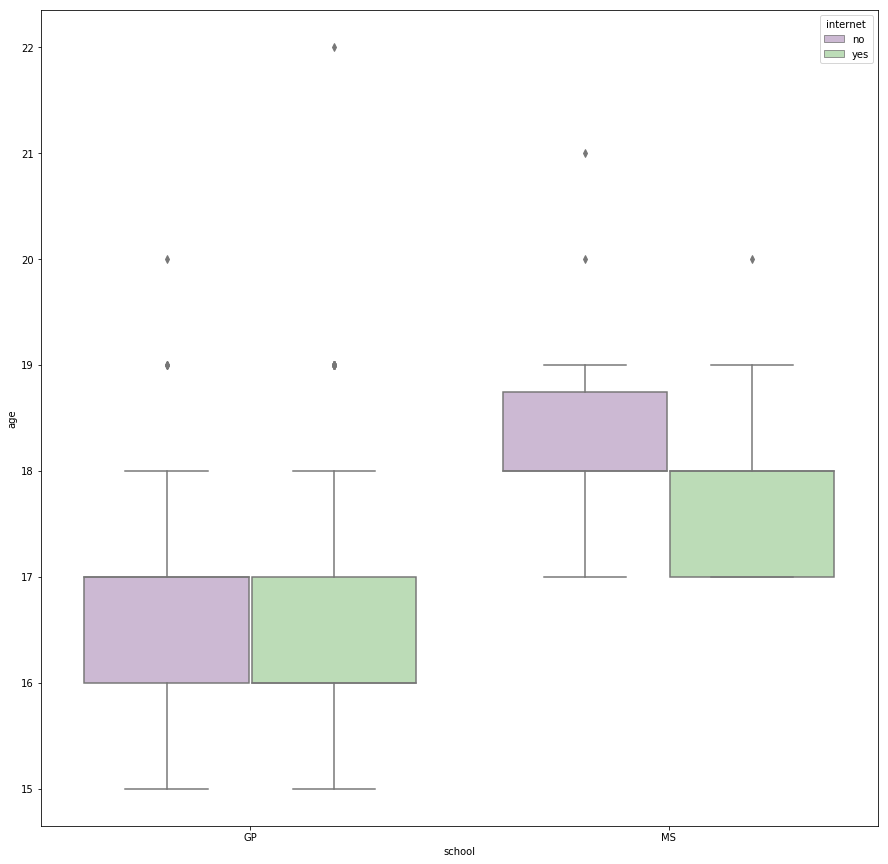

In [21]:
plt.figure(figsize=(15,15))
sns.boxplot(x="school",y="age",hue="internet",data=student_mat_dataframe,palette="PRGn")
plt.show()

Show students who want to go to university

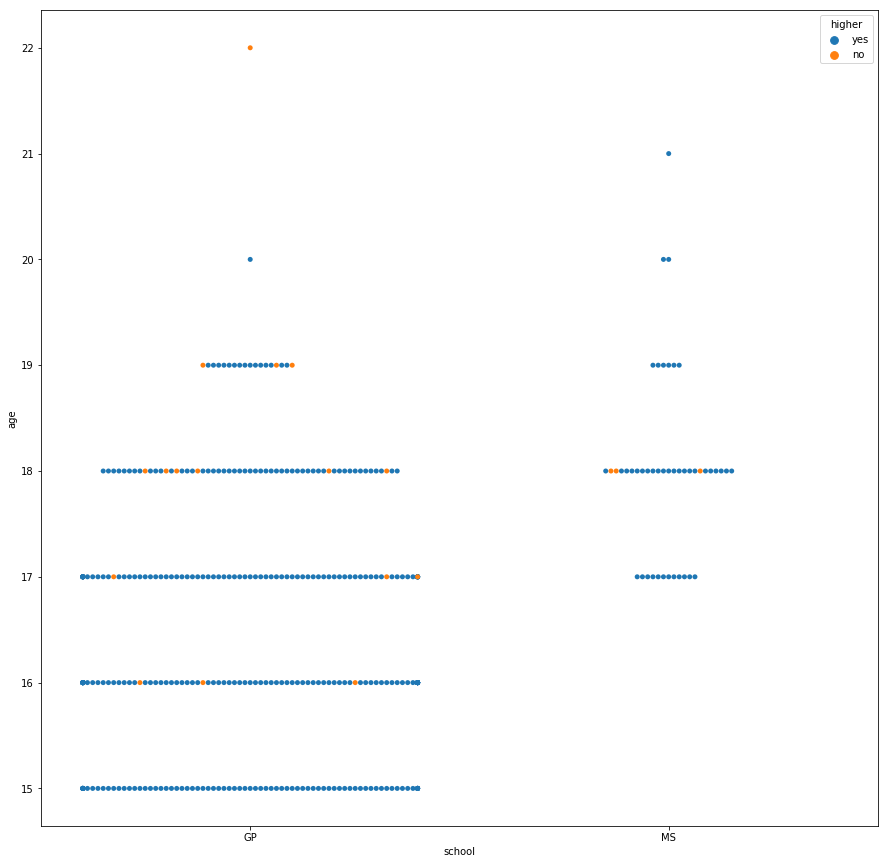

In [22]:
plt.figure(figsize=(15,15))
sns.swarmplot(x="school",y="age",hue="higher",data=student_mat_dataframe)
plt.show()

Weekly and daily alcohol consumption of students aged 15 years is given below

Intermediate values were not marked because alcohol consumption was an int number

In general, more alcohol is consumed over the weekend

Median values are not marked because alcohol consumption is counted as int, so the graph looks mixed

In [24]:
student_mat_dataframe2 = student_mat_dataframe.loc[:,["school","age","Dalc","Walc"]]


trace1 = go.Scatter(
    x = student_mat_dataframe2.age,
    y = student_mat_dataframe2.Walc,
    mode = "lines",
    name="Weekly Alcohol Consumption",
    marker = dict(color = 'green'),
    text = student_mat_dataframe2.school
)

trace2 = go.Scatter(
    x = student_mat_dataframe2.age,
    y = student_mat_dataframe2.Dalc,
    mode = "lines+markers",
    name="Daily Alcohol Consumption",
    marker = dict(color = 'blue'),
    text = student_mat_dataframe2.school
)

newData = [trace1,trace2]

layout = dict(title="Weekly and daily alcohol consumption of students aged 15 - Line Plot",
             xaxis=dict(title="Age",ticklen=5,zeroline=False))
fig = dict(data = newData,layout=layout)
iplot(fig)